In [74]:
pip install pandas matplotlib seaborn plotly statsmodels scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import necessary libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer


# Function to load and preprocess data


In [76]:
def load_data(filepath, sep=';'):
    """
    Load data from a CSV file and preprocess it by ensuring correct column names.
    """
    data = pd.read_csv(filepath, sep=sep)  # Poprawiono, dodano nazwę argumentu filepath
    # Normalize column names
    data.columns = [col.strip().lower().replace(' ', '_') for col in data.columns]
    return data

In [77]:
df = load_data('owid-co2-data.csv', sep=';')
print(df.head())

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.165   

# Function to filter data for European countries


In [78]:
def filter_european_countries(data, country_column='country'):
    """
    Filter the dataframe for European countries.
    """
    european_countries = [
        'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium',
        'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
        'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
        'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kazakhstan', 'Kosovo', 'Latvia',
        'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco',
        'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal',
        'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
        'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Vatican City'
    ]
    return data[data[country_column].isin(european_countries)]



In [79]:
european_df = filter_european_countries(df)
print(european_df.head())


     country  year iso_code  population  gdp  cement_co2  \
619  Albania  1850      ALB    501490.0  NaN         NaN   
620  Albania  1851      ALB    505313.0  NaN         NaN   
621  Albania  1852      ALB    509659.0  NaN         NaN   
622  Albania  1853      ALB    514536.0  NaN         NaN   
623  Albania  1854      ALB    519460.0  NaN         NaN   

     cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
619                    NaN  NaN             NaN              NaN  ...   
620                    NaN  NaN             NaN              NaN  ...   
621                    NaN  NaN             NaN              NaN  ...   
622                    NaN  NaN             NaN              NaN  ...   
623                    NaN  NaN             NaN              NaN  ...   

     share_global_other_co2  share_of_temperature_change_from_ghg  \
619                     NaN                                   NaN   
620                     NaN                                 0.

# Function for basic visualizations


In [80]:
def plot_histogram(data, column, title, xlabel, ylabel):
    """
    Plot a histogram for a given column of a dataframe.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_boxplot(data, x, y, title, xlabel, ylabel):
    """
    Plot a box plot for given x and y.
    """
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=x, y=y, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


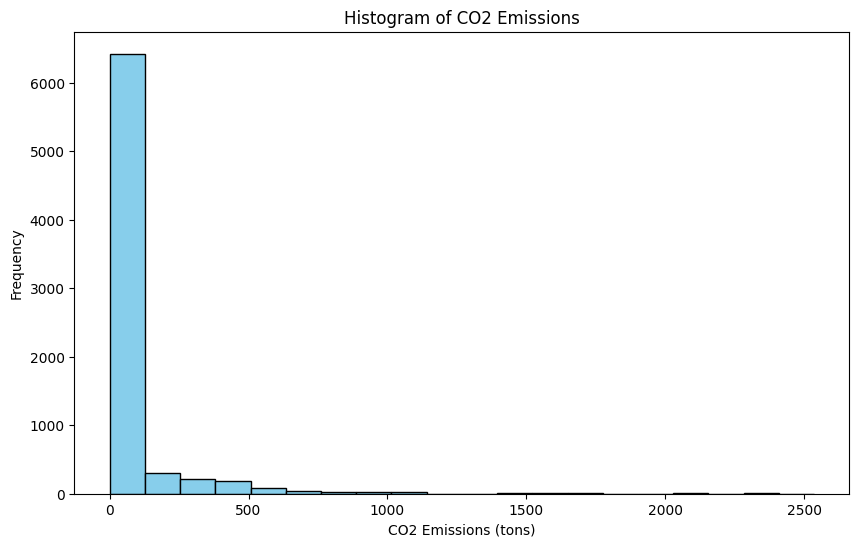

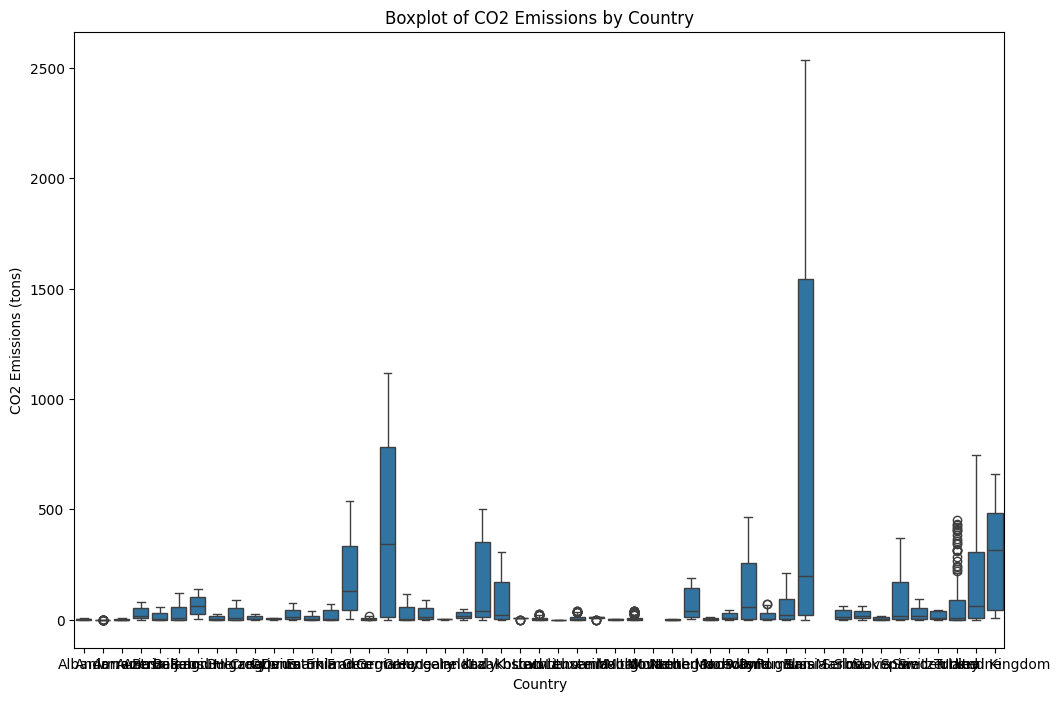

In [82]:
plot_histogram(european_df, 'co2', 'Histogram of CO2 Emissions', 'CO2 Emissions (tons)', 'Frequency')
plot_boxplot(european_df, 'country', 'co2', 'Boxplot of CO2 Emissions by Country', 'Country', 'CO2 Emissions (tons)')

# Function to perform data imputation


In [ ]:
def impute_data(data, column, strategy='mean'):
    """
    Impute missing values in a specified column using a defined strategy.
    """
    imputer = SimpleImputer(strategy=strategy)
    imputed_data = imputer.fit_transform(data[[column]])  
    data.loc[:, f'{column}_imputed'] = imputed_data  
    #imputer = SimpleImputer(strategy=strategy)
    #data[f'{column}_imputed'] = imputer.fit_transform(data[[column]])
    return data



In [ ]:
european_df = impute_data(european_df, 'co2')
print(european_df[['co2', 'co2_imputed']].head())

     co2  co2_imputed
619  NaN    75.936083
620  NaN    75.936083
621  NaN    75.936083
622  NaN    75.936083
623  NaN    75.936083


# Function to apply polynomial feature transformation


In [ ]:
def transform_to_polynomial_features(data, column, degree=2):
    """
    Transform features to polynomial features.
    """
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    transformed_data = poly_features.fit_transform(data[[column]].dropna())  
    return transformed_data

In [ ]:
polynomial_co2 = transform_to_polynomial_features(european_df, 'co2', degree=2)
print(polynomial_co2)


[[7.00000000e-03 4.90000000e-05]
 [7.00000000e-03 4.90000000e-05]
 [1.80000000e-02 3.24000000e-04]
 ...
 [3.26263000e+02 1.06447545e+05]
 [3.47465000e+02 1.20731926e+05]
 [3.18654000e+02 1.01540372e+05]]


# Function to split the dataset into training and testing sets


In [ ]:
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Split data into training and testing sets.
    """
    return train_test_split(X, y, test_size=test_size, random_state=random_state)



In [ ]:
feature_columns = european_df.select_dtypes(include=[np.number]).columns.tolist()
feature_columns.remove('co2_imputed')  
X = european_df[feature_columns]
y = european_df['co2_imputed']

X_train, X_test, y_train, y_test = split_data(X, y)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)



X_train shape: (7198, 77)
X_test shape: (1800, 77)
y_train shape: (7198,)
y_test shape: (1800,)


# Function to train a linear regression model


In [ ]:
def train_linear_regression(X_train, y_train):
    """
    Train a linear regression model.
    """
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model


# Function to predict using a trained model


In [ ]:
def predict(model, X_test):
    """
    Predict using the trained linear regression model.
    """
    return model.predict(X_test)


In [ ]:
model = LinearRegression()


# Function to calculate the root mean squared error of predictions

In [ ]:
def calculate_rmse(y_true, y_pred):
    """
    Calculate the root mean squared error between true and predicted values.
    """
    return np.sqrt(mean_squared_error(y_true, y_pred))


# Function to visualize regression results


In [ ]:
def plot_regression_results(X, y, y_pred, title, xlabel, ylabel):
    """
    Visualize actual data vs. predicted data in a scatter plot.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Actual Data')
    plt.scatter(X, y_pred, color='red', label='Regression Predictions')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()


# Function to create an interactive scatter plot using Plotly


In [ ]:
def plotly_scatter(data, x, y, color, title, xlabel, ylabel):
    """
    Create an interactive scatter plot using Plotly for better data exploration.
    """
    fig = px.scatter(data, x=x, y=y, color=color,
                     title=title, labels={x: xlabel, y: ylabel})
    fig.update_layout(transition_duration=500)
    return fig


# Function to create an interactive line plot using Plotly for time series data


In [ ]:
def plotly_time_series(data, x, y, color, title, xlabel, ylabel):
    """
    Create an interactive line plot using Plotly, ideal for time series analysis.
    """
    fig = px.line(df, x=x, y=y, color=color,
                  title=title, labels={x: xlabel, y: ylabel})
    fig.update_traces(mode='lines+markers')
    return fig

interactive_scatter = plotly_scatter(european_df, 'gdp_imputed', 'co2', 'country', 'Interactive Scatter: CO2 vs. GDP', 'GDP (USD)', 'CO2 Emissions (tonnes)')
interactive_line = plotly_time_series(european_df, 'year', 'co2', 'country', 'Interactive Line Plot: CO2 Emissions Over Time', 'Year', 'CO2 Emissions (tonnes)')


ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2', 'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct', 'co2_including_luc', 'co2_including_luc_growth_abs', 'co2_including_luc_growth_prct', 'co2_including_luc_per_capita', 'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy', 'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2', 'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita', 'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2', 'cumulative_co2_including_luc', 'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2', 'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita', 'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2', 'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita', 'land_use_change_co2', 'land_use_change_co2_per_capita', 'methane', 'methane_per_capita', 'nitrous_oxide', 'nitrous_oxide_per_capita', 'oil_co2', 'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2', 'primary_energy_consumption', 'share_global_cement_co2', 'share_global_co2', 'share_global_co2_including_luc', 'share_global_coal_co2', 'share_global_cumulative_cement_co2', 'share_global_cumulative_co2', 'share_global_cumulative_co2_including_luc', 'share_global_cumulative_coal_co2', 'share_global_cumulative_flaring_co2', 'share_global_cumulative_gas_co2', 'share_global_cumulative_luc_co2', 'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2', 'share_global_flaring_co2', 'share_global_gas_co2', 'share_global_luc_co2', 'share_global_oil_co2', 'share_global_other_co2', 'share_of_temperature_change_from_ghg', 'temperature_change_from_ch4', 'temperature_change_from_co2', 'temperature_change_from_ghg', 'temperature_change_from_n2o', 'total_ghg', 'total_ghg_excluding_lucf', 'trade_co2', 'trade_co2_share', 'co2_imputed'] but received: gdp_imputed

In [ ]:
# Correlation matrix heatmap
correlation_matrix = df_europe[['co2', 'gdp', 'population', 'co2_per_capita']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of CO2 Data')
plt.show()


NameError: name 'df_europe' is not defined

# Data Analysis


               co2           gdp    population  co2_per_capita
count  7373.000000  4.437000e+03  8.801000e+03     7275.000000
mean     75.936083  2.237497e+11  1.162834e+07        3.889709
std     208.915893  4.789280e+11  2.022879e+07        4.587599
min       0.000000  4.287330e+08  2.221000e+03        0.000000
25%       1.085000  1.656445e+10  1.210827e+06        0.376000
50%       9.373000  5.296341e+10  3.815565e+06        2.295000
75%      47.179000  1.848885e+11  1.005746e+07        6.291000
max    2536.248000  3.885961e+12  1.488973e+08       41.048000


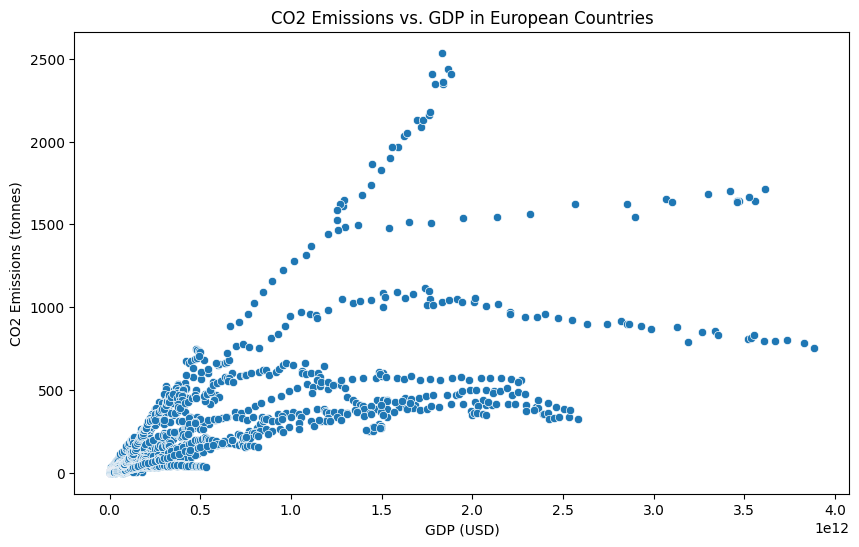

In [ ]:
# Summary statistics
print(european_df[['co2', 'gdp', 'population', 'co2_per_capita']].describe())

# Scatter plot of CO2 emissions vs. GDP
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp', y='co2', data=european_df)
plt.title('CO2 Emissions vs. GDP in European Countries')
plt.xlabel('GDP (USD)')
plt.ylabel('CO2 Emissions (tonnes)')
plt.show()
